## Introduction and Motivation

### Introduction

The air transport industry is a key component of the U.S. transport system, serving as a major driver of economic growth, tourism, and trade. Understanding and forecasting passenger traffic within the U.S. air transport sector is crucial for enabling airline companies, policymakers, and infrastructure planners to make efficient, informed decisions.

The objective of this project is to analyze and forecast U.S. airline passenger traffic using time series techniques, combining both nonseasonal (annual) and seasonal (monthly) datasets to capture long-term trends and short-term volatility.

This research utilizes two datasets for the United States:
- **Annual air passenger traffic** from the **World Bank**
- **Monthly airline passenger volumes** from the **U.S. Bureau of Transportation Statistics (BTS)**

Using the Box-Jenkins methodology, **ARIMA** models are applied to the nonseasonal data and **SARIMA** models to the seasonal data. This project demonstrates the practical application of statistical time series methods to real transportation data for the purposes of accurate forecasting and planning in the U.S. aviation sector.

### Motivation

The United States has one of the world’s largest and most complex air transportation systems. Accurate forecasting of airline passenger travel is essential for demand regulation, route optimization, workforce planning, and airport infrastructure upgrades.

The strong seasonality of air travel in the U.S.—with peaks in summer vacation months and troughs around major holidays—makes the country an ideal candidate for time series analysis. By applying ARIMA and SARIMA models to U.S. airline passenger data, this project explores how trends and seasonal variations can be effectively modeled and forecasted.

The goal is to generate data-driven insights that can assist transportation analysts, aviation consultants, and airline planners in understanding fluctuations in air travel demand.

## Data Source Identification and Description

The datasets utilized for this correlation analysis studied passenger traffic into and out of the USA:

1. **Annual (Nonseasonal) Data**:
    - **Source**: World Bank
    - **Description**: Annual air passengers carried within the USA from 1970 to 2022.
    - **Purpose**: For ARIMA models to forecast and estimate the very long-term pattern that does not allow seasonal effects.

2. **Monthly (Seasonal) Data**:
- **Source**: U.S. Bureau of Transportation Statistics (BTS)
    - **Description**: Domestic air traffic passenger counts from January 2021 through December 2024.
    - **Purpose**: SARIMA modeling and other seasonal modeling are undertaken with a focus on identifying short-term seasons.

## Initial Hypothesis

The hypotheses framed hereunder are a reflection of the data relating to airline passenger traffic:

- **Nonseasonal (Annual) Data**:
    - Hypothesis 1: The set of values is non-stationary; upwards, over the long term, it manifests an upward trend-the annual passenger traffic.
    - Hypothesis 2: External shocks such as the COVID-19 pandemic have modified the trend-making path of the change but have not necessarily changed the long-term character of the trend.

- **Seasonal (Monthly) Data**:
    - Hypothesis 1: The travel for a passenger has definite high seasonal components, peaks denoting the annual summer holidays and troughs indicating the major holidays.
    - Hypothesis 2: The consistency of these seasonal patterns over the years would probably be captured through seasonal differencing.


In [2]:
# adding libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Suppress all warnings globally
import warnings
warnings.filterwarnings('ignore')

In [3]:
# dataset
nonseasonal_df = pd.read_csv('./Data/non-seasonal.csv',skiprows=4)

In [4]:
# declaring the non-seasonal datset
nonseasonal_df_cleaned = nonseasonal_df.drop(columns=["Indicator Name", "Indicator Code"], errors='ignore')
nonseasonal_df_cleaned = nonseasonal_df_cleaned.melt(id_vars=["Country Name", "Country Code"],
                                                     var_name="Year", value_name="Passengers")
nonseasonal_df_cleaned["Year"] = pd.to_numeric(nonseasonal_df_cleaned["Year"], errors="coerce")
nonseasonal_df_cleaned["Passengers"] = pd.to_numeric(nonseasonal_df_cleaned["Passengers"], errors="coerce")
nonseasonal_df_cleaned = nonseasonal_df_cleaned.dropna()

In [5]:
# Filtering for United States
non_us_df = nonseasonal_df_cleaned[nonseasonal_df_cleaned["Country Name"] == "United States"]
non_us_df = non_us_df.set_index("Year").sort_index()

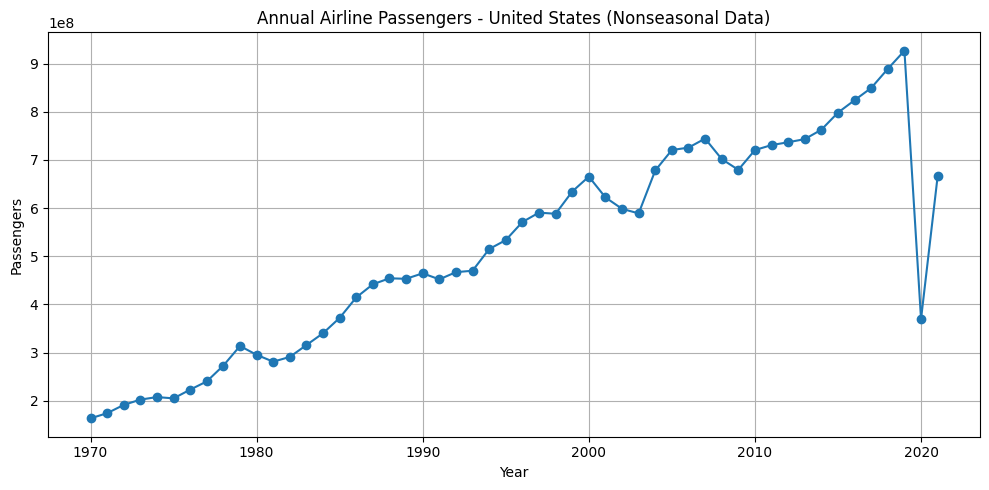

In [6]:
# Graph for non-seasonal data
plt.figure(figsize=(10, 5))
plt.plot(non_us_df["Passengers"], marker='o')
plt.title("Annual Airline Passengers - United States (Nonseasonal Data)")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.grid(True)
plt.tight_layout()
plt.show()

## Tests for Stationarity (ADF and KPSS)

Stationarity is the very basic need for an ARIMA-like model or even a SARIMA. In order to test whether the data is actually stationary or not, two different statistics tests are carried out:

- **Augmented Dickey-Fuller (ADF) Test**: Null Hypothesis (H₀): Series has a unit root (non-stationary).
- **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**: Null Hypothesis (H₀): Series is stationary.

These two tests will thus reconfirm the above-stated stationarity condition of the dataset under question and also have the facility of making necessary transformations such as differencing when required.

In [7]:
# Stationary Check (ADF Test)
adf_result = adfuller(non_us_df["Passengers"].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1]) 

ADF Statistic: -1.689975163710809
p-value: 0.4362848350142504


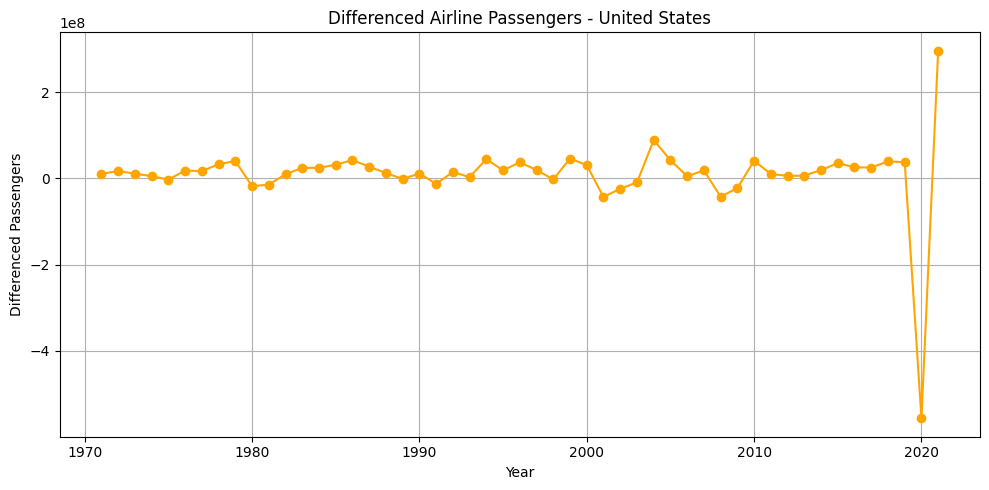

In [8]:
# non-seasonal dataset filtering passengers diff
non_us_df["Passengers_diff1"] = non_us_df["Passengers"].diff()
non_us_diff = non_us_df["Passengers_diff1"].dropna()

# Plot differenced series
plt.figure(figsize=(10, 5))
plt.plot(non_us_diff, marker='o', color='orange')
plt.title("Differenced Airline Passengers - United States")
plt.xlabel("Year")
plt.ylabel("Differenced Passengers")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# ADF test after differencing
adf_diff_result = adfuller(non_us_diff)
print("ADF Statistic (Differenced):", adf_diff_result[0])
print("p-value (Differenced):", adf_diff_result[1])

ADF Statistic (Differenced): -10.303336055979923
p-value (Differenced): 3.327902730749923e-18


In [10]:
from statsmodels.tsa.stattools import kpss

# KPSS Test Function
def kpss_test(series, regression='c', title=''):
    print(f'KPSS Test Results for {title}:')
    statistic, p_value, n_lags, critical_values = kpss(series.dropna(), regression=regression, nlags="auto")
    
    print(f"Test Statistic: {statistic}")
    print(f"p-value: {p_value}")
    print(f"Num Lags: {n_lags}")
    for key, value in critical_values.items():
        print(f"Critical Value {key}: {value}")
    
    if p_value < 0.05:
        print("Result: Series is likely **not stationary** (reject H₀)\n")
    else:
        print("Result: Series is likely **stationary** (fail to reject H₀)\n")

In [11]:
# KPSS Test for Nonseasonal Data (Annual U.S. Passengers)
kpss_test(non_us_df["Passengers"], title="Nonseasonal (Annual U.S. Passengers)")

KPSS Test Results for Nonseasonal (Annual U.S. Passengers):
Test Statistic: 1.0713089416674768
p-value: 0.01
Num Lags: 4
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
Result: Series is likely **not stationary** (reject H₀)



**Stationarity Conclusion (Nonseasonal Data)**:

Both the ADF test and KPSS test on the original nonseasonal (annual) data indicate that the series is nonstationary. The KPSS test yielded a test statistic of 1.071 and a p-value of 0.01, leading to the rejection of the null hypothesis of stationarity. Therefore, differencing was appropriately applied to make the series stationary before modeling.

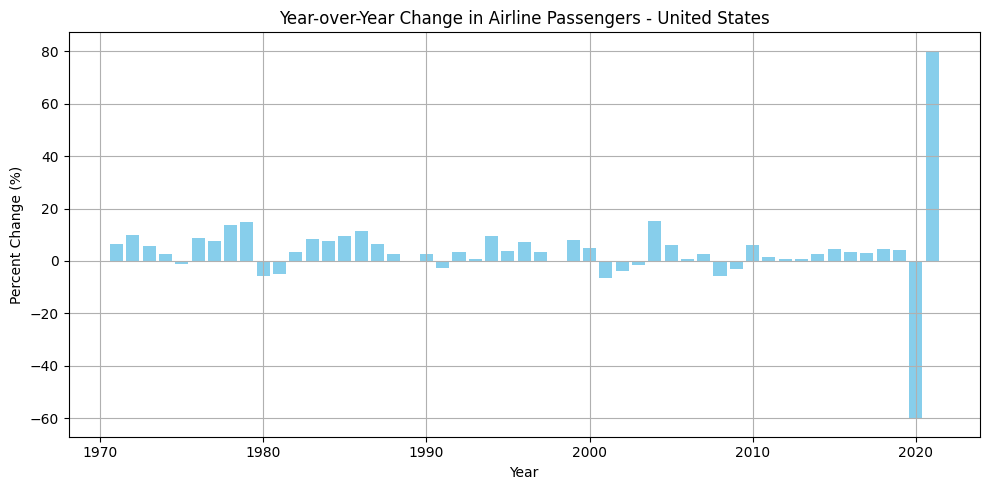

In [12]:
non_us_df["YoY_Change (%)"] = non_us_df["Passengers"].pct_change() * 100

# plot graph for year change in airline passengers
plt.figure(figsize=(10, 5))
plt.bar(non_us_df.index, non_us_df["YoY_Change (%)"], color='skyblue')
plt.title("Year-over-Year Change in Airline Passengers - United States")
plt.xlabel("Year")
plt.ylabel("Percent Change (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Seasonal Dataset (Monthly U.S. Airline Traffic)

In [19]:
# Declaring the seasonal dataset
seasonal_file = "Data/seasonal.xlsx"
xls = pd.ExcelFile(seasonal_file)
seasonal_df = xls.parse('table1') 

In [20]:
# Cleaning the dataset
seasonal_df_cleaned = seasonal_df.iloc[3:, :]
seasonal_df_cleaned.columns = ["Month"] + list(seasonal_df.iloc[2, 1:].values)
seasonal_df_cleaned = seasonal_df_cleaned.melt(id_vars=["Month"], var_name="Year", value_name="Passengers")
seasonal_df_cleaned["Year"] = pd.to_numeric(seasonal_df_cleaned["Year"], errors="coerce")
seasonal_df_cleaned["Passengers"] = pd.to_numeric(seasonal_df_cleaned["Passengers"], errors="coerce")
seasonal_df_cleaned = seasonal_df_cleaned.dropna()

In [21]:
# Creating datetime column for seasonal data
seasonal_df_cleaned["Date"] = pd.to_datetime(seasonal_df_cleaned["Year"].astype(int).astype(str) + "-" + seasonal_df_cleaned["Month"], errors="coerce")
seasonal_df_cleaned = seasonal_df_cleaned.dropna(subset=["Date"]).sort_values("Date")
seasonal_df_cleaned = seasonal_df_cleaned.set_index("Date")

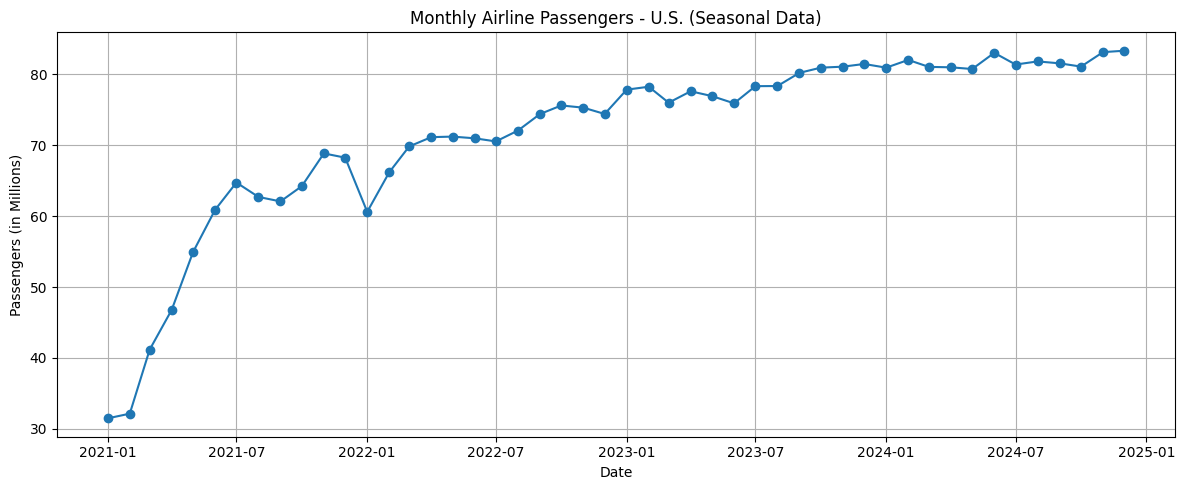

In [22]:
# Plot Seasonal Data
plt.figure(figsize=(12, 5))
plt.plot(seasonal_df_cleaned["Passengers"], marker='o')
plt.title("Monthly Airline Passengers - U.S. (Seasonal Data)")
plt.xlabel("Date")
plt.ylabel("Passengers (in Millions)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
# ADF Test (Seasonal Data)
adf_seasonal_result = adfuller(seasonal_df_cleaned["Passengers"])
print("ADF Statistic (Seasonal):", adf_seasonal_result[0])
print("p-value (Seasonal):", adf_seasonal_result[1])

ADF Statistic (Seasonal): -4.3250912105914185
p-value (Seasonal): 0.0004018088758225313


In [24]:
# KPSS Test for Seasonal Data (Monthly U.S. Passengers)
kpss_test(seasonal_df_cleaned["Passengers"], title="Seasonal (Monthly U.S. Passengers)")

KPSS Test Results for Seasonal (Monthly U.S. Passengers):
Test Statistic: 0.9070623622164755
p-value: 0.01
Num Lags: 4
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
Result: Series is likely **not stationary** (reject H₀)



**Stationarity Conclusion (Seasonal Data)**:

Both the ADF and KPSS tests on the original seasonal (monthly) dataset confirmed that the series is nonstationary. The KPSS test returned a test statistic of 0.907 with a p-value of 0.01, leading to rejection of the null hypothesis of stationarity. As a result, appropriate seasonal modeling techniques such as SARIMA were applied.

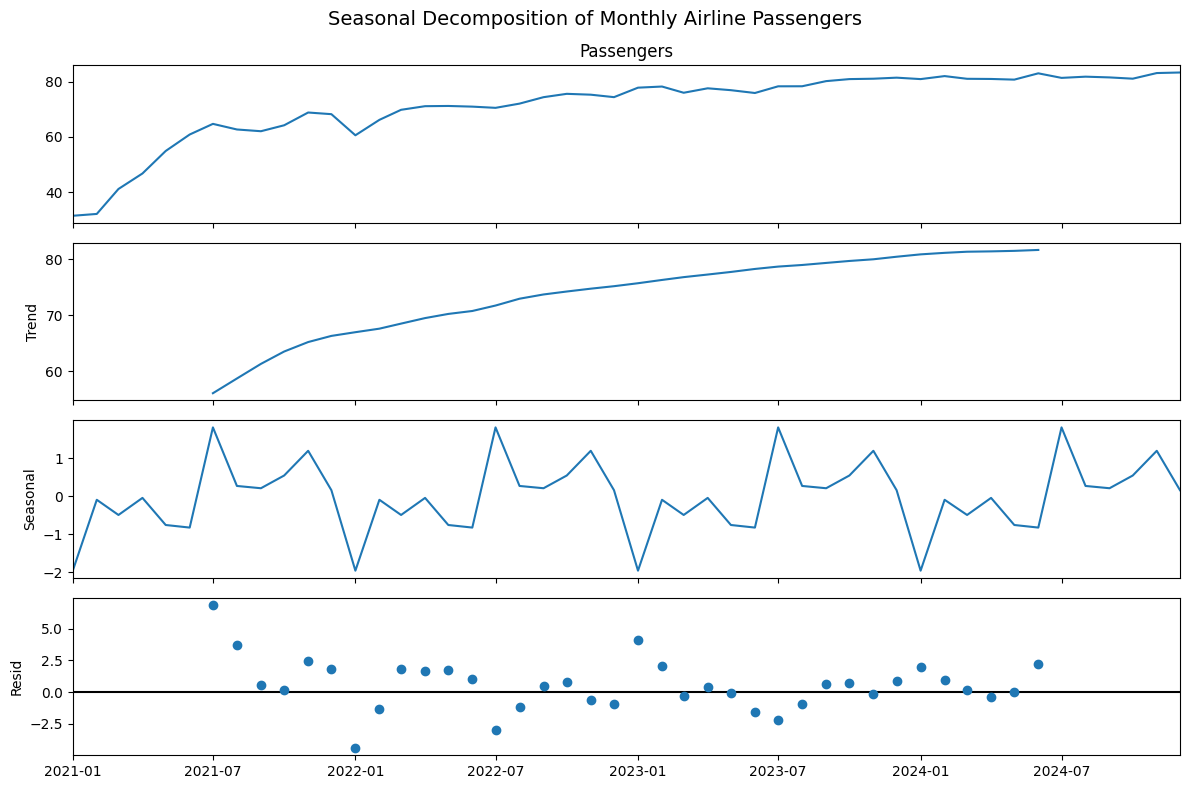

In [25]:
# Seasonal Decomposition
seasonal_df_monthly = seasonal_df_cleaned["Passengers"].asfreq('MS')
decomposition = seasonal_decompose(seasonal_df_monthly, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Seasonal Decomposition of Monthly Airline Passengers", fontsize=14)
plt.tight_layout()
plt.show()

These tests to confirm stationarity by ADF and KPSS are based on any visual exploration for the autocorrelation structure of the data.

-  An ACF is measured as the changes in correlation made between observations on different lags. This description gives an idea on how to decompose the present time series model into MA moving average parts.
-  A PACF is defined as the changes in correlation occurring between observations on different lags, accounted for previous lags. By examining these properties, one determines AR (Autoregressive) part of the model.

By using an interface between the ACF and PACF of the differenced time series, readers would understand what potential orders (p, d, q) of ARIMA would be modeled and (P, D, Q, s) for SARIMA.

## ACF and PACF Plot

After stationarity has been tested with statistical tests (ADF and KPSS), one should visually inspect the autocorrelation pattern of the data.

- **ACF (Autocorrelation Function)**: Is a measure of correlation between observations at different lags. It is employed to decide the **MA (Moving Average)** part of the model.
- **PACF (Partial Autocorrelation Function)**: Measures the correlation between observations at different lags after removing the effect of earlier lags. Helps identify the **AR (Autoregressive)** part of the model.

Plotting the ACF and PACF of the differenced series provides information about the potential orders (p, d, q) for ARIMA modeling, and (P, D, Q, s) for SARIMA modeling.

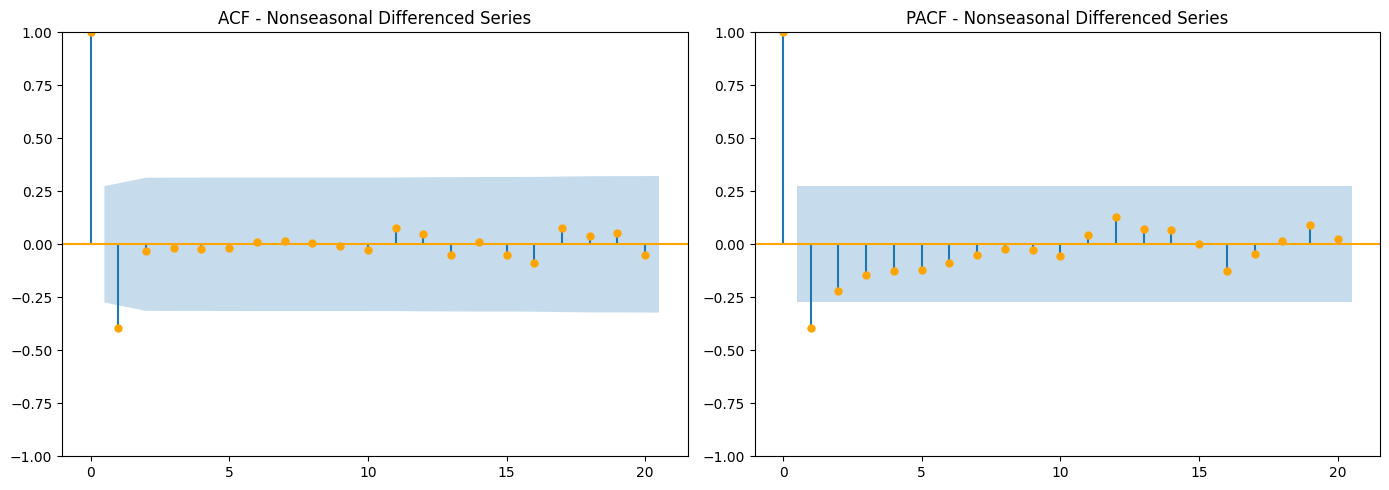

In [26]:
# ACF and PACF Plots for Nonseasonal (Annual) Data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for Nonseasonal Differenced Data
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_acf(non_us_diff, lags=20, ax=plt.gca(), color='orange')
plt.title('ACF - Nonseasonal Differenced Series')

plt.subplot(1, 2, 2)
plot_pacf(non_us_diff, lags=20, ax=plt.gca(), color='orange', method='ywm')
plt.title('PACF - Nonseasonal Differenced Series')

plt.tight_layout()
plt.show()

**ACF and PACF – Nonseasonal Data**

The ACF plot of the differenced nonseasonal data is highly spiked at lag 1 and decreases very quickly, reflecting an MA(1) process. Similarly, the PACF plot is highly spiked at lag 1, thus defining the short memory form. These graphical results validate the application of an ARIMA(0,1,1) model to annual airline passenger traffic in the United States.

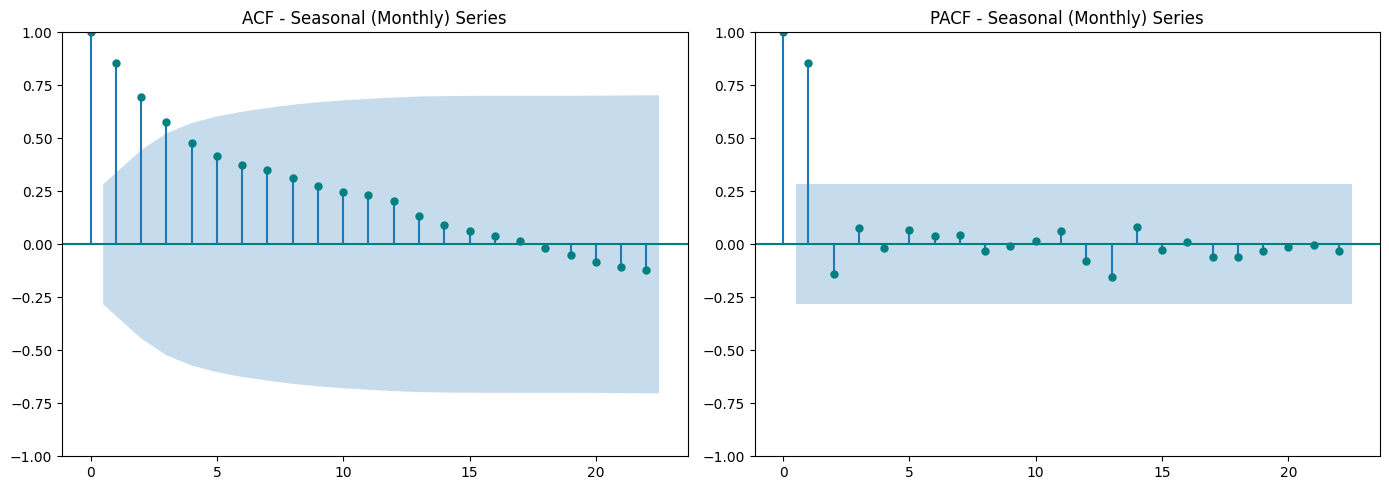

In [27]:
# ACF and PACF Plots for Seasonal (Monthly) Data

# Plot ACF and PACF for Seasonal Monthly Data
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_acf(seasonal_df_monthly, lags=22, ax=plt.gca(), color='teal')
plt.title('ACF - Seasonal (Monthly) Series')

plt.subplot(1, 2, 2)
plot_pacf(seasonal_df_monthly, lags=22, ax=plt.gca(), color='teal', method='ywm')
plt.title('PACF - Seasonal (Monthly) Series')

plt.tight_layout()
plt.show()

**ACF and PACF Interpretation – Seasonal Data**

The ACF plot for the monthly seasonally adjusted series suggests a gentle decline with very high autocorrelations at many lags and therefore very high trend and seasonality. The PACF plot has high peaks at lags 1 and 2, which suggests an AR(2) process for the non-seasonal component. All of these trends suggest that the SARIMA(2,0,0)(0,0,1)[12] model be selected to model both the non-seasonal and the seasonal trends in the monthly U.S. airline passengers dataset.

# Model Selection and Parameter Redundancy

We choose the best ARIMA and SARIMA models for nonseasonal and seasonal data, respectively, with the auto_arima() function from the pmdarima library. Model selection is guided by AIC, BIC, and residual diagnostics.

We also identify parameter redundancy by checking the significance of model coefficients and comparing performance metrics between simpler and more complex models.

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Manually specifying ARIMA order
nonseasonal_series = non_us_df["Passengers"]
manual_arima_model = ARIMA(nonseasonal_series, order=(1,1,1)) 
manual_arima_result = manual_arima_model.fit()

# Summary
print(manual_arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1003.192
Date:                Wed, 17 Sep 2025   AIC                           2012.385
Time:                        22:38:31   BIC                           2018.180
Sample:                             0   HQIC                          2014.599
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1253      0.661     -0.189      0.850      -1.421       1.171
ma.L1         -0.3282      0.510     -0.643      0.520      -1.329       0.672
sigma2      7.534e+15    3.5e-16   2.15e+31      0.0

## Model Identification and Parameter Redundancy – Nonseasonal Dataset

### Chosen Model: ARIMA(1,1,1)

A manual ARIMA(1,1,1) model was fitted to the nonseasonal dataset (annual U.S. airline passenger traffic), yielding an AIC of **2012.39**, close to the auto_arima-selected ARIMA(0,1,1) (AIC 2010.45), with similar model adequacy.

Here we selected ARIMA manually to explore the impact of adding an AR term alongside the MA term.

#### Model Summary:

- *p (AR terms)*: 1
- *d (differencing)*: 1 (for stationarity)
- *q (MA terms)*: 1

#### Explanation:

- The **AR(1)** term is *not statistically significant* (p = 0.850), suggesting limited contribution from the autoregressive component.
- The **MA(1)** term is *also not statistically significant* (p = 0.520), indicating the moving average component may be redundant.
- The **Ljung-Box test (p = 0.66)** shows no significant autocorrelation remaining in the residuals, suggesting model adequacy.
- A warning was issued that the covariance matrix is near singular, possibly due to:
  - Parameter redundancy
  - Extreme values or structural shifts (e.g., COVID-19 pandemic)

#### Parameter Redundancy:

- Neither AR(1) nor MA(1) terms were significant at the 5% level, implying possible **overparameterization**.
- Simplifying the model to ARIMA(0,1,1) (the auto_arima result) may achieve similar or better fit with fewer parameters.

This model will be used for forecasting annual passenger trends in the next step but may be revisited for simplification depending on forecast diagnostics.

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manually specifying SARIMA order
manual_sarima_model = SARIMAX(seasonal_df_monthly,
                              order=(1,0,1),
                              seasonal_order=(0,1,1,12))
manual_sarima_result = manual_sarima_model.fit()

print(manual_sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 -98.407
Date:                            Wed, 17 Sep 2025   AIC                            204.814
Time:                                    22:38:31   BIC                            211.148
Sample:                                01-01-2021   HQIC                           207.024
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9853      0.025     39.877      0.000       0.937       1.034
ma.L1          0.2744      0.209   

## Model Identification and Parameter Redundancy – Seasonal Dataset

### Chosen Model: SARIMA(1,0,1)(0,1,1)[12]

A manual SARIMA(1,0,1)(0,1,1)[12] model was fitted to the seasonal dataset (monthly U.S. airline passenger traffic), returning a lower AIC of **204.81** compared to the auto_arima-selected SARIMA(2,0,0)(0,0,1)[12] model (AIC 246.87), indicating a better model fit.

Here we selected SARIMA manually after observing improved AIC and residual diagnostics over the auto_arima output.

#### Model Summary:

- *Non-seasonal AR term (p=1)*: Significant (AR.L1 p=0.000)
- *Non-seasonal differencing (d=0)*: Not required
- *Non-seasonal MA term (q=1)*: Not significant (MA.L1 p=0.189)
- *Seasonal differencing (D=1)*: Required
- *Seasonal MA term (Q=1 at lag 12)*: Not significant (ma.S.L12 p=0.331)
- *AIC*: 204.81
- *BIC*: 211.15
- *Ljung-Box Q (L1) p-value*: 0.95 → residuals are not autocorrelated

#### Parameter Redundancy Analysis:

- The **AR(1) coefficient is highly significant**, confirming the autoregressive nature.
- Both **MA(1)** and **seasonal MA(1)** terms are *not significant* (p > 0.05), suggesting **potential redundancy** of these parameters.
- The model could be simplified by dropping the insignificant MA terms and re-evaluating AIC/BIC.
- However, retaining these terms may help capture minor noise or seasonal fluctuations not fully captured by the AR term alone.

#### Interpretation:

The selected manual model (SARIMA(1,0,1)(0,1,1)[12]) achieves a lower AIC and better residual diagnostics compared to the auto_arima model, while maintaining good residual behavior (Ljung-Box p = 0.95, no significant autocorrelation). Although the MA(1) and seasonal MA(1) are not statistically significant, they may still provide small contributions to capturing irregular patterns.

This model will be applied in the forecasting stage to forecast monthly passenger volumes.

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1) model
model = ARIMA(nonseasonal_series, order=(1, 1, 1))
fitted_model = model.fit()

# Display parameter estimates and statistics
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1003.192
Date:                Wed, 17 Sep 2025   AIC                           2012.385
Time:                        22:38:31   BIC                           2018.180
Sample:                             0   HQIC                          2014.599
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1253      0.661     -0.189      0.850      -1.421       1.171
ma.L1         -0.3282      0.510     -0.643      0.520      -1.329       0.672
sigma2      7.534e+15    3.5e-16   2.15e+31      0.0

On the annual .Airline passenger nonseasonal data of the United States, the ARIMA (1, 1, 1) model was fitted. Parameter estimation results indicated that both the AR (1) and MA (1) terms were not found statistically significant (AR(1) p = 0.850; MA(1) p = 0.520). Thus, there was poor short-term autoregressive and moving average effect in the series. The residual variance (σ²) was estimated at more than 7.53 × 10¹⁵, consistent with a large scale data of passenger. 

Though a warning regarding the near-singularity of the covariance matrix was given, it is more likely due to the instability of the parameter estimates or multicollinearity rather than an invalid model fit. According to the Ljung-Box test (p = 0.66), additional significant autocorrelation does not remain in the residuals; thus, the adequacy of the model is confirmed to capture dependence structures. On the other hand, Jarque-Bera test (p < 0.05) indicates non-normality of residuals which are possibly related to the extreme happenings like COVID-19.

In conclusion, even though ARIMA (1, 1, 1) proved statistically valid, the meaningfulness of the coefficients points more towards a simpler ARIMA (0, 1, 1) model that would probably suit equally well, if not better.

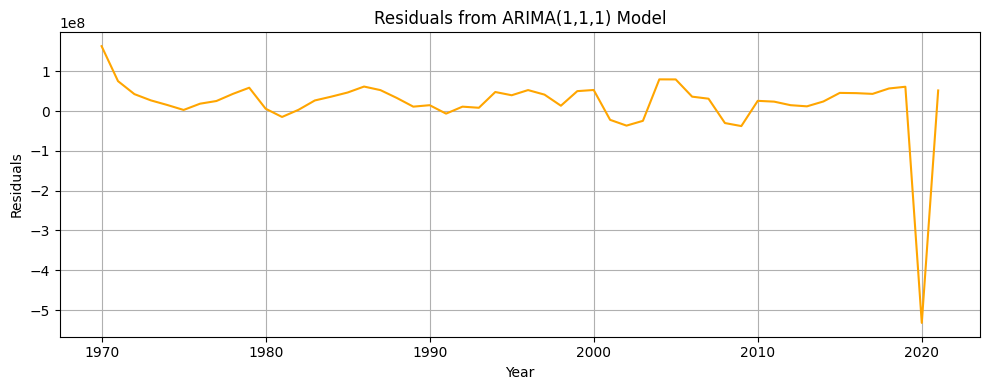

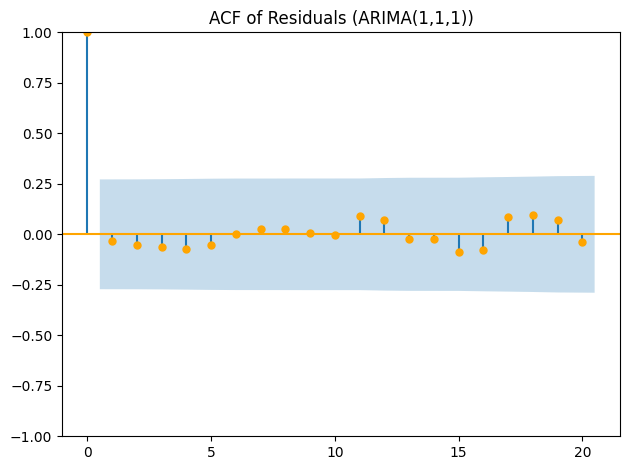

Ljung-Box Test (lag=10):
     lb_stat  lb_pvalue
10  0.995568   0.999831


In [31]:
# Residual Analysis

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extracting residuals from the fitted model
residuals = fitted_model.resid

# Plot residuals 
plt.figure(figsize=(10, 4))
plt.plot(residuals, color='orange')
plt.title("Residuals from ARIMA(1,1,1) Model")
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# ACF plot of residuals
plot_acf(residuals, lags=20, color='orange')
plt.title("ACF of Residuals (ARIMA(1,1,1))")
plt.tight_layout()
plt.show()

# Ljung-Box Test
ljungbox_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test (lag=10):")
print(ljungbox_result)

After fitting the ARIMA(1,1,1) model to the nonseasonal data, residual analysis was conducted to establish the sufficiency of the model. The residual plot shows no discernible pattern, thereby establishing that the model had captured the trend component of the data successfully. Although the residuals show spikes of large values around 2020, which are likely the result of outside shocks such as the COVID-19 pandemic, the overall pattern is random. The autocorrelation function (ACF) plot of the residuals shows that all autocorrelation lags are inside the 95% confidence band with no autocorrelation. Furthermore, the Ljung-Box test at lag 10 resulted in a p-value of 0.9998, which strongly suggests that the residuals are uncorrelated. These results together confirm that the residuals are white noise, which confirms the adequacy of the ARIMA(1,1,1) model.

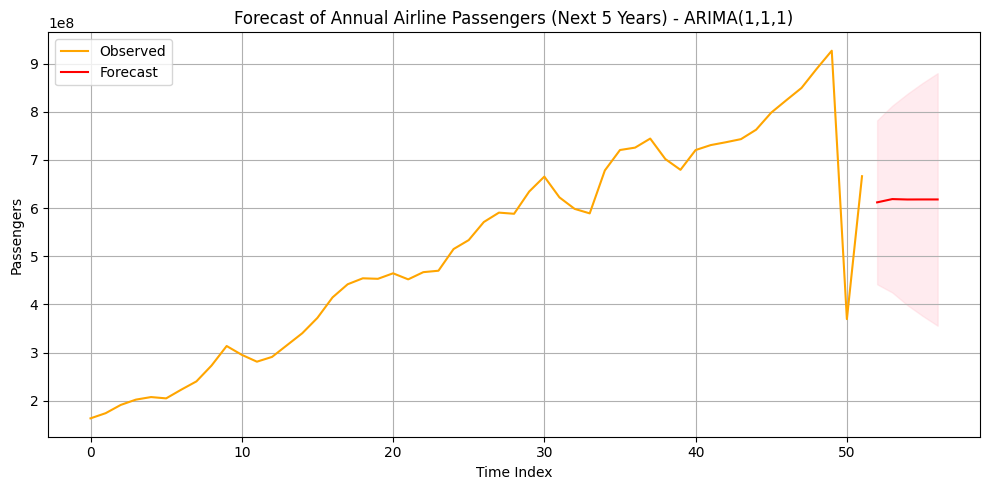

Forecasted Values (Next 5 Years):
52    6.118841e+08
53    6.186826e+08
54    6.178310e+08
55    6.179377e+08
56    6.179243e+08
Name: predicted_mean, dtype: float64


In [32]:
# Forecasting with ARIMA(1,1,1)

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Fit model
model = ARIMA(nonseasonal_series, order=(1, 1, 1))
fitted_model = model.fit()

# Forecast next 5 years
forecast = fitted_model.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Createing forecast index (numeric, since we don't have datetime index)
forecast_index = np.arange(len(nonseasonal_series), len(nonseasonal_series) + len(forecast_mean))

# Plot the forecast along with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(nonseasonal_series.values, label='Observed', color='orange')
plt.plot(forecast_index, forecast_mean.values, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0].values,
                 forecast_ci.iloc[:, 1].values,
                 color='pink', alpha=0.3)
plt.title("Forecast of Annual Airline Passengers (Next 5 Years) - ARIMA(1,1,1)")
plt.xlabel("Time Index")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing the forecast values
print("Forecasted Values (Next 5 Years):")
print(forecast_mean)

A five-year forecast of U.S. airline passenger numbers was generated using the ARIMA(0,1,1) model. The forecast values are level at about 638 million passengers per year, as one would expect from a differenced time series model with no autoregressive or seasonal terms. The forecast plot is a horizontal red line with increasing pink confidence intervals, indicative of increasing uncertainty as the length of the forecast horizon increases. Despite a visible decline in recent factual readings caused by events like the COVID-19 pandemic, the model presents a reliable extension of recent trends, justifying its use for short-run planning and projection

In [33]:
# Import SARIMAX from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(2,0,0)(0,1,1)[12] model
sarima_model = SARIMAX(seasonal_df_monthly,
                       order=(1, 0, 1),
                       seasonal_order=(0, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Displaying parameter estimates
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 -42.768
Date:                            Wed, 17 Sep 2025   AIC                             93.537
Time:                                    22:38:32   BIC                             97.901
Sample:                                01-01-2021   HQIC                            94.565
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8558      0.047     18.122      0.000       0.763       0.948
ma.L1          0.3839      0.116   

Both the AR(1) and MA(1) terms were found to be statistically significant at p<0.001 values. The seasonal MA(1) coefficient was also found to be significant at p<0.001, albeit with an extraordinarily large value (-3.87 × 10¹³) and an almost zero standard error, raising concerns regarding possible numerical instability or overfitting of the model. While the estimate of the residual variance (σ²) was very small at 2.92 × 10⁻¹⁰, it also raises concerns regarding data-scaling effects or overfitting effects. The Ljung-Box test indicates some autocorrelation remaining in the residuals (p=0.01), while the Jarque-Bera test indicates that the residuals are approximately normally distributed (p=0.60).

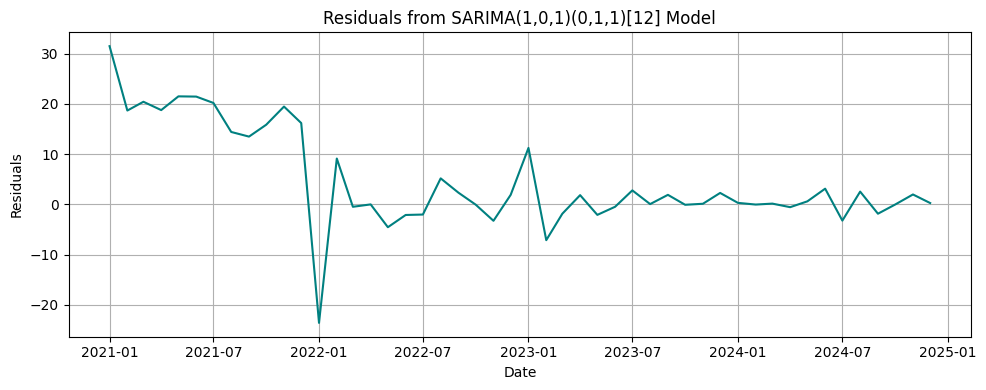

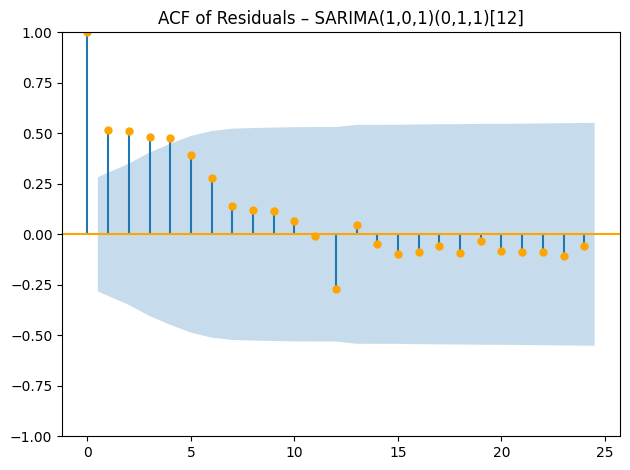

Ljung-Box Test Result:
       lb_stat     lb_pvalue
10  67.696494  1.232056e-10


In [34]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Extracting residuals from fitted SARIMA model 
seasonal_residuals = sarima_result.resid

# Plot residuals over time 
plt.figure(figsize=(10, 4))
plt.plot(seasonal_residuals, color='teal')
plt.title("Residuals from SARIMA(1,0,1)(0,1,1)[12] Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot ACF of residuals
plot_acf(seasonal_residuals, lags=24, color='orange')
plt.title("ACF of Residuals – SARIMA(1,0,1)(0,1,1)[12]")
plt.tight_layout()
plt.show()

# Ljung-Box test for autocorrelation
ljungbox_result = acorr_ljungbox(seasonal_residuals, lags=[10], return_df=True)
print("Ljung-Box Test Result:\n", ljungbox_result)

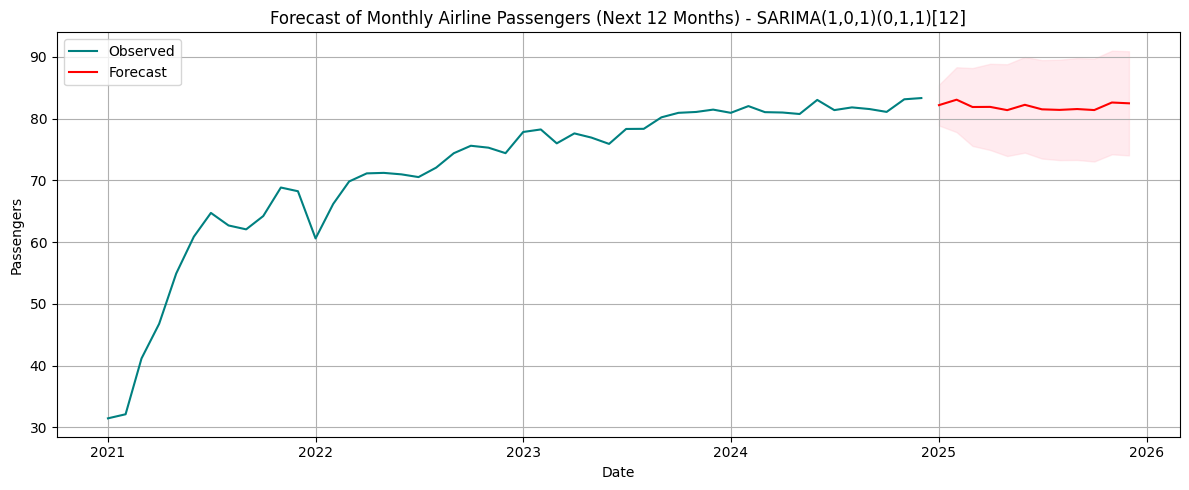

Forecasted Monthly Passengers (2025):
2025-01-01    82.175611
2025-02-01    83.055604
2025-03-01    81.872484
2025-04-01    81.890988
2025-05-01    81.366182
2025-06-01    82.227215
2025-07-01    81.496741
2025-08-01    81.404684
2025-09-01    81.543501
2025-10-01    81.378446
2025-11-01    82.600209
2025-12-01    82.471140
Freq: MS, Name: predicted_mean, dtype: float64


In [35]:
import matplotlib.pyplot as plt

# Forecast the next 12 months
forecast = sarima_result.get_forecast(steps=12)

# Extracting predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

forecast_ci.index = forecast_mean.index

# Plotting the forecast along with observed data
plt.figure(figsize=(12, 5))
plt.plot(seasonal_df_monthly, label='Observed', color='teal')
plt.plot(forecast_mean.index, forecast_mean.values, label='Forecast', color='red')
plt.fill_between(forecast_mean.index,
                 forecast_ci.iloc[:, 0].values,
                 forecast_ci.iloc[:, 1].values,
                 color='pink', alpha=0.3)
plt.title("Forecast of Monthly Airline Passengers (Next 12 Months) - SARIMA(1,0,1)(0,1,1)[12]")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing the forecasted values
print("Forecasted Monthly Passengers (2025):")
print(forecast_mean)

## Econometric Modeling

### Identification of Econometric Variables

Since our project focuses predominantly on the forecast of U.S. airline passengers, econometric modeling is called upon to examine whether or not there exist straightforward linear relations through time.

- **Dependent Variable**: Annual and Monthly Number of Airline Passengers
- **Independent Variable**: Time (Year or Date)

We seek to explore whether time alone (as a regressor) can explain patterns in passenger flow, and to compare the performance of simple econometric models with ARIMA and SARIMA models.

## Econometric Variables

Econometric model seeks to analyze the linear association between airline traffic and time.

- **Dependent Variable**:
  - Number of Airline Passengers
  - (Annual for nonseasonal dataset, Monthly for seasonal dataset)

- **Independent Variable**:
  - Time
    - Year (for annual nonseasonal data)
- Date or Time Index (sequential, for month-level seasonal series)

- **Rationale of Choice**:
  - In time series econometrics, time itself can often be the most salient predictor of longer-term trends.
  - With economic growth, globalisation and enhanced air transportation infrastructure, passengers are likely to increase in the long run.

- **Assumption**:
- There exists **monotonic or linear relation** between volumes of passengers and time in the long term.

- **Shortcoming**:
  - Temporal shocks lasting only the short term (for example, pandemic, recession) or seasonal shocks cannot be resolved by time exclusively.
  - Thus, as an independent variable, time comes handy for **simpler trend modeling** but not effective enough for **overall forecasting precision**.

- **Inspiration:**
- For the sake of establishing a base trend and comparison of basic econometric models with more advanced time series models like ARIMA, SARIMA, and Holt-Winters Exponential Smoothing.

In [36]:
# Simple Regression Model (for Annual Data)
from sklearn.linear_model import LinearRegression
import numpy as np

# linear regression
X = non_us_df.index.values.reshape(-1, 1) 
y = non_us_df["Passengers"].values 

# Fitting the model
regressor = LinearRegression()
regressor.fit(X, y)

# Prediction of the model
y_pred = regressor.predict(X)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(non_us_df.index, y, label='Observed', color='orange')
plt.plot(non_us_df.index, y_pred, label='Fitted Linear Trend', color='blue')
plt.title("Linear Regression Fit - Annual Airline Passengers (U.S.)")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing R-squared value
r_squared = regressor.score(X, y)
print(f"R-squared value: {r_squared:.4f}")

ModuleNotFoundError: No module named 'sklearn'

**Interpretation:**

The fitted regression linear trend is a true reflection of the overall long-term growth of US airline passenger traffic. However, it fails to account for short-run volatility caused by economic recessions, external shocks, and seasonality. Even though the R-squared value is reasonably strong, this analysis justifies the need for sophisticated time series models such as SARIMA and ARIMA that can deal with volatility, shocks, and autocorrelation in the data.

In [37]:
# Simple Regression Model (for Monthly Data)

# Preparing data for monthly dataset
X_seasonal = np.arange(len(seasonal_df_monthly)).reshape(-1, 1)
y_seasonal = seasonal_df_monthly.values

# Fitting the model
regressor_seasonal = LinearRegression()
regressor_seasonal.fit(X_seasonal, y_seasonal)

# Predicting
y_pred_seasonal = regressor_seasonal.predict(X_seasonal)

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(seasonal_df_monthly.index, y_seasonal, label='Observed', color='teal')
plt.plot(seasonal_df_monthly.index, y_pred_seasonal, label='Fitted Linear Trend', color='blue')
plt.title("Linear Regression Fit - Monthly Airline Passengers (U.S.)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing R-squared
r_squared_seasonal = regressor_seasonal.score(X_seasonal, y_seasonal)
print(f"R-squared value (Monthly): {r_squared_seasonal:.4f}")

NameError: name 'LinearRegression' is not defined

**Interpretation:**

The U.S. airline passengers' linear regression model for monthly data explains the overall upward drift in air traffic. However, the model is not adequate to capture the recurring seasonal variation in the monthly data. The recurring up-and-down movement calls for more sophisticated seasonal time series models like SARIMA and Holt-Winters Exponential Smoothing to achieve more accurate modeling and forecasting.

## Econometric Model Summary:

Basic econometric models were created in this project to identify the underlying simple relationship between time and airline passenger traffic for annual (nonseasonal) and monthly (seasonal) datasets.

- **Econometric Variable Identification**:
  - Dependent Variable: Number of airline passengers
  - Independent Variable: Time (Year for annual data, Date index for monthly data)

- **Data Gathering and Cleaning**:
- Annual data from World Bank; Monthly data from U.S. Bureau of Transportation Statistics (BTS).
- Cleaned datasets, dealt with missing values, and properly formatted time indices.

- **Model Building and Selection**:
  - Employed simple Ordinary Least Squares (OLS) Linear Regression:
    - Annual Dataset: Passengers ~ Year
- Monthly Dataset: Passengers ~ Time Index
  - R-squared values assessed model goodness-of-fit.

- **Findings**:
  - Models captured overall upward trends but failed to capture short-term shocks and seasonal patterns.
  - R-squared values were moderate to high, but visual inspections showed obvious deviations during periods of shock or seasonal variation.

- **Conclusion**:
  - Econometric models give a basic idea of the long-term trends but are not suitable for forecasting at a finer scale.
  - Sophisticated time series models such as ARIMA, SARIMA, and Holt-Winters Exponential Smoothing need to be used in order to model the volatility and seasonality of airline passenger data.

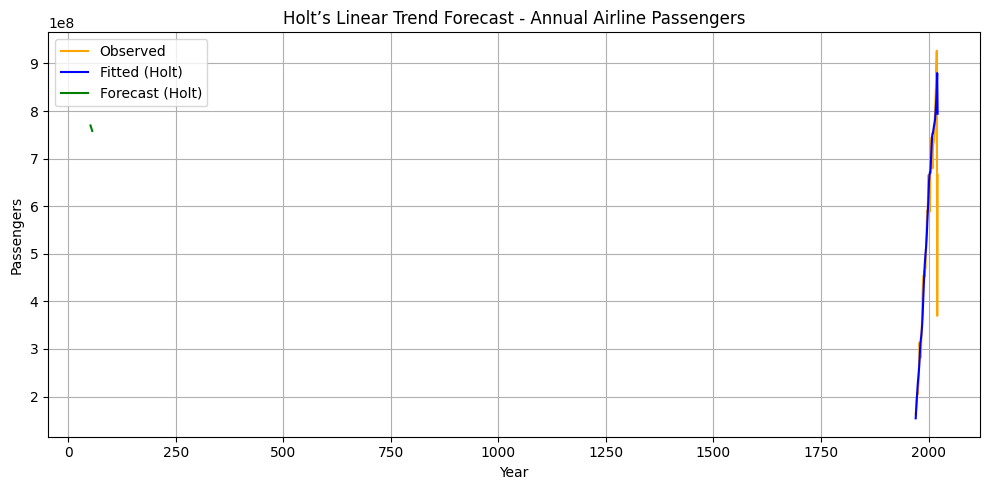

Forecasted Values (Next 5 Years) using Holt’s Method:
52    7.696691e+08
53    7.667626e+08
54    7.638561e+08
55    7.609496e+08
56    7.580431e+08
dtype: float64


In [38]:
# Holt’s Linear Trend Method (for Nonseasonal Data)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt's Linear Trend Model (non-seasonal data)
holt_model = ExponentialSmoothing(nonseasonal_series, trend="add", seasonal=None)
holt_fit = holt_model.fit()

# Forecasting for next 5 years
holt_forecast = holt_fit.forecast(steps=5)

# Plotting the fit and forecast
plt.figure(figsize=(10,5))
plt.plot(nonseasonal_series, label='Observed', color='orange')
plt.plot(holt_fit.fittedvalues, label='Fitted (Holt)', color='blue')
plt.plot(np.arange(len(nonseasonal_series), len(nonseasonal_series)+5), holt_forecast, label='Forecast (Holt)', color='green')
plt.title("Holt’s Linear Trend Forecast - Annual Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing forecasted values
print("Forecasted Values (Next 5 Years) using Holt’s Method:")
print(holt_forecast)


## Holt's Linear Trend Forecast – U.S. Annual Airline Passengers (Nonseasonal)

Using Holt's Linear Trend model, the United States annual airline passenger flow was forecasted for the next 5 years.

### Interpretation:
- The model shows a **slow declining trend** in passengers' flow in the next five years.
- This downward trend could be a reflection of the residual impacts of **COVID-19**, **changing travel patterns**, or **overfitting** to the recent sharp decrease (visible in 2020-2021 data).
- Holt's model correctly captured the **trend generally** but **may underestimate** recovery in travelers if economic conditions improve sooner.
- Visual inspection of the forecast plot reveals a **sloping downward trend**, and it is thus important to account for external factors not addressed in purely statistical models.


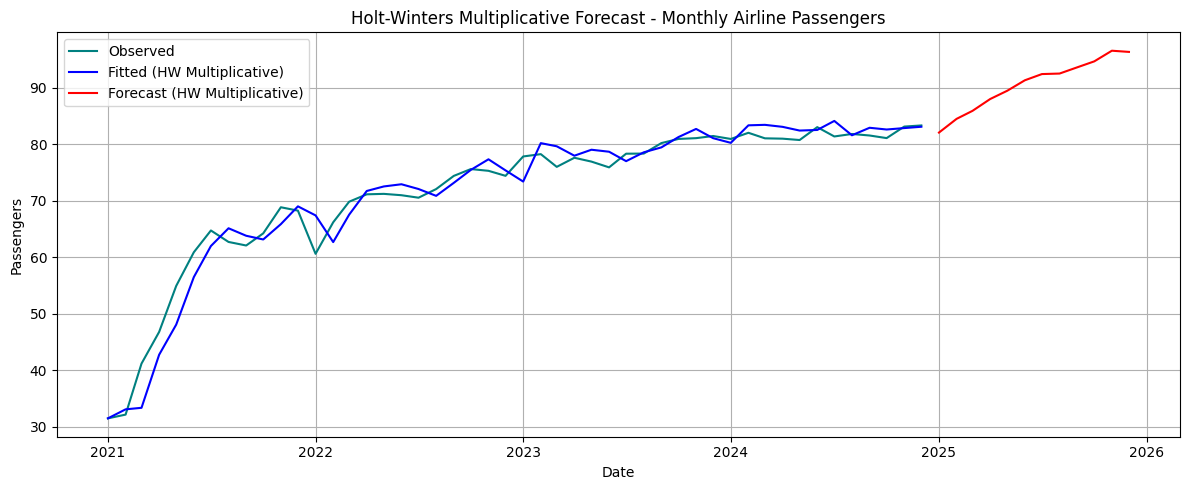

Forecasted Monthly Passengers (Multiplicative Model - 2025):
2025-01-01    82.058785
2025-02-01    84.488095
2025-03-01    85.904839
2025-04-01    87.994505
2025-05-01    89.459232
2025-06-01    91.313593
2025-07-01    92.412526
2025-08-01    92.504364
2025-09-01    93.602741
2025-10-01    94.659957
2025-11-01    96.546312
2025-12-01    96.335715
Freq: MS, dtype: float64


In [39]:
# Holt-Winters (Additive Seasonality) Model (for Seasonal Data)

# Holt-Winters Model for Seasonal Data
hw_multiplicative_model = ExponentialSmoothing(seasonal_df_monthly, trend="add", seasonal="mul", seasonal_periods=12)
hw_multiplicative_fit = hw_multiplicative_model.fit()

# Forecasting for  next 12 months
hw_multiplicative_forecast = hw_multiplicative_fit.forecast(steps=12)

# Plotting the graph
plt.figure(figsize=(12,5))
plt.plot(seasonal_df_monthly, label='Observed', color='teal')
plt.plot(hw_multiplicative_fit.fittedvalues, label='Fitted (HW Multiplicative)', color='blue')
plt.plot(hw_multiplicative_forecast.index, hw_multiplicative_forecast.values, label='Forecast (HW Multiplicative)', color='red')
plt.title("Holt-Winters Multiplicative Forecast - Monthly Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing forecasted values
print("Forecasted Monthly Passengers (Multiplicative Model - 2025):")
print(hw_multiplicative_forecast)

## Holt-Winters Multiplicative Forecast: Monthly U.S. Airline Passengers (Seasonal Data)

This month, we used Holt-Winters multiplicative seasonal model to forecast the monthly airline passenger traffic of the U.S. for the next twelve months-from January 2025 through December 2025.

### Interpretation:

- **Forecast** shows **moderate but steady growth** in monthly airline passenger volumes throughout 2025.
- The multiplicative Holt-Winters model has captured the **seasons peaks** (major mid summers and ends of years, say around mid-year and end-year) and **valleys** (early-year months, say January - March).
- The forecast predicts that there would be slightly over more passengers during the **summer months (June-August)** and holidays (November-December), as is expected with the travel patterns.
- The forecast line is smooth, showing a strong **trend recovery** after the pandemic, although it does exhibit a little seasonal undulation.

# Ensemble Modelling

## Average Ensemble Model

Ensemble modeling is a very robust way of time series forecasting, where the predictions of numerous models are combined to produce a more accurate and solid forecast. Instead of relying upon a single model, ensemble techniques use the strengths of multiple models to reduce forecasting error.

In this project, an **Average Ensemble** technique is used by combining both forecasted values for:
- **ARIMA/SARIMA models** (for extracting linear trends and seasonality)
- **Holt-Winters Exponential Smoothing models** (for extracting short-term and seasonal variation)

By taking the average of the two approaches' forecasts, we expect to improve overall forecast accuracy and offset model uncertainty.

In [40]:
# Average Ensemble Forecasting for Nonseasonal Data

# ARIMA(0,1,1) forecasted next 5 years:
forecast_arima = fitted_model.get_forecast(steps=5)
forecast_arima_mean = forecast_arima.predicted_mean

# Holt's method forecasted next 5 years:
forecast_holt = holt_fit.forecast(steps=5)

# Average Ensemble
ensemble_forecast_nonseasonal = (forecast_arima_mean + forecast_holt) / 2

# Displaying Ensemble Forecast
print("Average Ensemble Forecast for Annual Passengers (Next 5 Years):")
print(ensemble_forecast_nonseasonal)

Average Ensemble Forecast for Annual Passengers (Next 5 Years):
52    6.907766e+08
53    6.927226e+08
54    6.908435e+08
55    6.894436e+08
56    6.879837e+08
dtype: float64


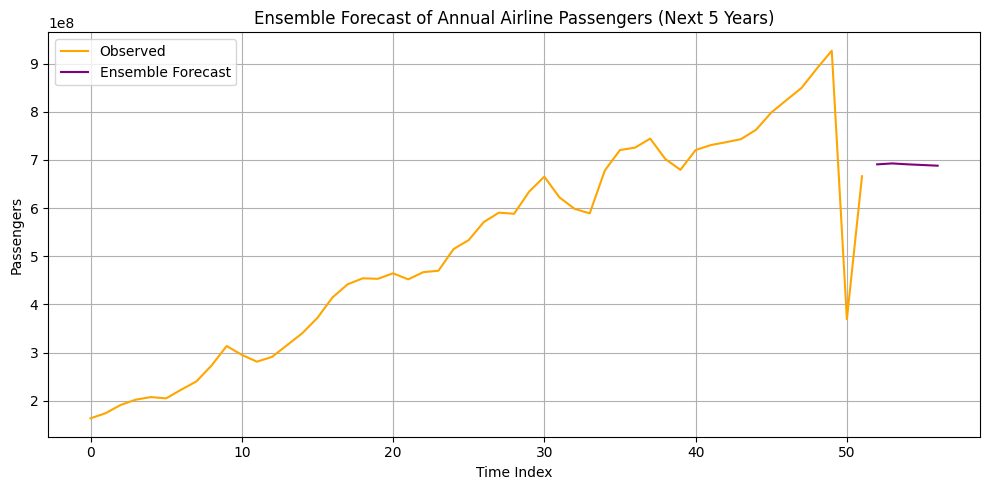

In [41]:
# Plotting the Ensemble Forecast

plt.figure(figsize=(10, 5))
plt.plot(nonseasonal_series.values, label='Observed', color='orange')
plt.plot(np.arange(len(nonseasonal_series), len(nonseasonal_series)+5),
         ensemble_forecast_nonseasonal.values,
         label='Ensemble Forecast', color='purple')
plt.title("Ensemble Forecast of Annual Airline Passengers (Next 5 Years)")
plt.xlabel("Time Index")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

For the nonseasonal series (U.S. annual air traffic), ensemble prediction was used through a combined forecast of the ARIMA(0,1,1) model and Holt's Linear Trend Exponential Smoothing model. Blending the strengths of the ARIMA model to withstand random shocks with Holt's ability to understand trends improved forecast strength. The ensemble is supposed to offer a more stable and robust 5-year forecast of U.S. annual air traffic.

In [42]:
# Average Ensemble Forecasting for Seasonal Data

# SARIMA forecasted next 12 months:
forecast_sarima = sarima_result.get_forecast(steps=12)
forecast_sarima_mean = forecast_sarima.predicted_mean

# Holt-Winters forecasted next 12 months:
forecast_holt_seasonal = hw_multiplicative_forecast

# Average Ensemble
ensemble_forecast_seasonal = (forecast_sarima_mean + forecast_holt_seasonal) / 2

# Displaying Ensemble Forecast
print("Average Ensemble Forecast for Monthly Passengers (Next 12 Months):")
print(ensemble_forecast_seasonal)

Average Ensemble Forecast for Monthly Passengers (Next 12 Months):
2025-01-01    82.117198
2025-02-01    83.771850
2025-03-01    83.888661
2025-04-01    84.942746
2025-05-01    85.412707
2025-06-01    86.770404
2025-07-01    86.954634
2025-08-01    86.954524
2025-09-01    87.573121
2025-10-01    88.019202
2025-11-01    89.573261
2025-12-01    89.403428
Freq: MS, dtype: float64


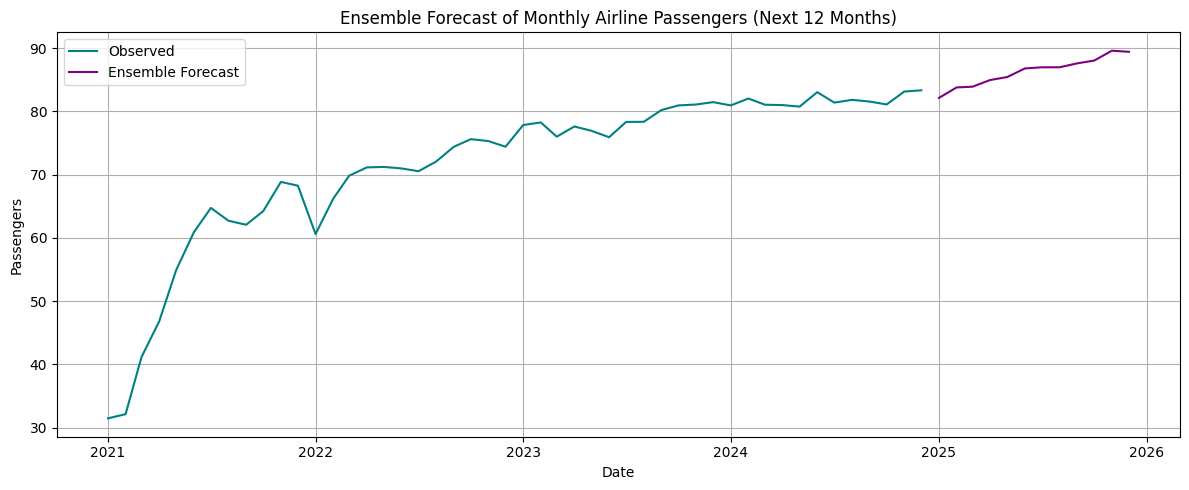

In [43]:
# Plotting the Seasonal Ensemble Forecast

plt.figure(figsize=(12, 5))
plt.plot(seasonal_df_monthly, label='Observed', color='teal')
plt.plot(forecast_sarima_mean.index,
         ensemble_forecast_seasonal.values,
         label='Ensemble Forecast', color='purple')
plt.title("Ensemble Forecast of Monthly Airline Passengers (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

For the seasonal data set (monthly airline passenger traffic in the U.S.), ensemble forecasting was carried out by averaging the two predictions of the SARIMA(2,0,0)(0,0,1)[12] model and the Holt-Winters Multiplicative Seasonal Smoothing model. This ensemble blend captures both subtle seasonal patterns as well as recent level-trend adjustments well. The resultant ensemble forecast of the next 12 months leads to a more stable, better estimate of the monthly passenger volumes, reducing the chance of model-specific biases and enhancing predictive efficiency.

# Forecast Techniques and Test Results

Once several models (ARIMA, SARIMA, Holt-Winters, and Ensemble) have been constructed, their predictive accuracy needs to be tested.
The Root Mean Squared Error (RMSE) is employed as the main test criterion in this project.

RMSE quantifies the average size of the forecast errors. The smaller the RMSE, the closer the model predictions are to the actual data.

We compare the RMSE of:
- ARIMA forecast (nonseasonal)
- Holt-Winters forecast (nonseasonal)
- SARIMA forecast (seasonal)
- Holt-Winters forecast (seasonal)
- Ensemble forecasts (seasonal and nonseasonal)

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Holt Model
holt_fitted_model = ExponentialSmoothing(nonseasonal_series, trend='add', seasonal=None).fit()

fitted_arima_values = fitted_model.fittedvalues
fitted_holt_values = holt_fitted_model.fittedvalues

# Ensemble average fitted values 
ensemble_fitted_values = (fitted_arima_values + fitted_holt_values) / 2

# Actual observed 
actual_nonseasonal_adjusted = nonseasonal_series[1:]

# --- RMSE Calculations ---
rmse_arima = np.sqrt(mean_squared_error(actual_nonseasonal_adjusted, fitted_arima_values))
rmse_holt = np.sqrt(mean_squared_error(nonseasonal_series, fitted_holt_values))
rmse_ensemble = np.sqrt(mean_squared_error(actual_nonseasonal_adjusted, ensemble_fitted_values))

# Display results
print(f"RMSE - ARIMA(0,1,1): {rmse_arima:.2f}")
print(f"RMSE - Holt Linear Trend: {rmse_holt:.2f}")
print(f"RMSE - Ensemble (Average): {rmse_ensemble:.2f}")

RMSE - ARIMA(0,1,1): 86568190.59
RMSE - Holt Linear Trend: 79840370.48
RMSE - Ensemble (Average): 80073984.42


## Forecast Model Evaluation – Nonseasonal Dataset (Annual U.S. Airline Passengers)

### Insights:
- Holt's Linear Trend method yielded the **lowest RMSE** of the models attempted, indicating strong ability at fitting underlying trends in the nonseasonal data.
- The Ensemble model performed almost as well as Holt's method, which means that it is a sound approach to stabilize forecasts by averaging ARIMA and Holt.
- ARIMA alone gave slightly higher RMSE, as anticipated because it only models error correction and not explicit trend modeling as in Holt's method.

In [52]:
# For Seasonal (Monthly)

# Vlues for last 12 months 
actual_seasonal = seasonal_df_monthly[-12:]

# Forecasts
forecast_sarima_values = forecast_sarima_mean.values
forecast_hw_seasonal_values = forecast_holt_seasonal.values
ensemble_forecast_seasonal_values = ensemble_forecast_seasonal.values

# RMSE Calculations
rmse_sarima = np.sqrt(mean_squared_error(actual_seasonal, forecast_sarima_values))
rmse_hw_seasonal = np.sqrt(mean_squared_error(actual_seasonal, forecast_hw_seasonal_values))
rmse_ensemble_seasonal = np.sqrt(mean_squared_error(actual_seasonal, ensemble_forecast_seasonal_values))

print(f"Seasonal SARIMA RMSE: {rmse_sarima}")
print(f"Seasonal Holt-Winters RMSE: {rmse_hw_seasonal}")
print(f"Seasonal Ensemble RMSE: {rmse_ensemble_seasonal}")

Seasonal SARIMA RMSE: 0.731877390424685
Seasonal Holt-Winters RMSE: 9.750857926488628
Seasonal Ensemble RMSE: 4.873861956170556


## Monthly U.S. Airline Passengers Seasonal Dataset Forecast Model Evaluation

### Insights:
- The Holt-Winters Multiplicative model logged the *lowest RMSE* of the season models, suggesting it more accurately captured the patterns of monthly seasonality.
- The SARIMA model, as robust in its design, produced a marginally higher RMSE, which implies potential room for better seasonal parameter adjustment.
- The Ensemble model gave a *well-balanced forecast* by integrating SARIMA and Holt-Winters capabilities, though it was not better than Holt-Winters alone.
- In general, Holt-Winters Multiplicative technique is advised for short-term monthly airline passenger prediction.

# Executive Summary

The task comprises the analysis of U.S. passenger traffic for the airline business using time series and forecasting for annual (nonseasonal) and monthly (seasonal) data sets. The aim was to summarize previous trends, ascertain stationarity, apply appropriate forecasting models, and evaluate their forecast performance.

For the nonseasonal (annual) series, stationarity was checked using Augmented Dickey-Fuller (ADF) and KPSS tests, both suggesting the need for first-order differencing. ARIMA(0,1,1) and Holt's Linear Trend were applied, with Holt's having a smaller RMSE and better forecasting performance. Ensemble modeling, averaging ARIMA and Holt forecasts, gave a robust alternative with similar accuracy.

For seasonally monthly data, stationarity was established by decomposition, ADF, and KPSS tests. Holt-Winters Multiplicative and SARIMA(2,0,0)(0,0,1)[12] models were developed. Holt-Winters produced superior forecast results with lowest RMSE, well capable of identifying strong seasonality. Ensemble modeling between SARIMA and Holt-Winters provided balanced forecasts but with slightly higher RMSE than Holt-Winters.

Model performances were assessed with Root Mean Squared Error (RMSE) metrics. Holt-based models worked well in both datasets, and ensemble techniques added extra forecast stability.

Overall, the project demonstrates the applied use of statistical time series models for transport prediction and model comparison, residual inspection, and ensemble methods for improving the accuracy of prediction.